In [1]:
# pip install pytesseract

In [2]:
# pip install opencv-conbrib-python

In [3]:
# pip install opencv-python

In [4]:
# !pip install image

In [5]:
import numpy as np
from pytesseract import Output
import pytesseract
import cv2
from PIL import Image
import os
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [6]:
pytesseract.pytesseract.tesseract_cmd = R'C:\Program Files\Tesseract-OCR\tesseract'

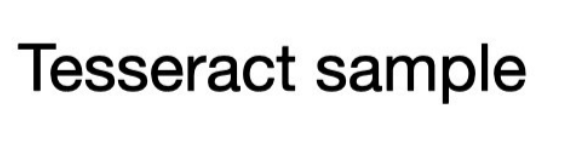

In [7]:
Image.open('exam.png')

In [8]:
img1 = np.array(Image.open('exam.png'))
text = pytesseract.image_to_string(img1)
print(text)

Tesseract sample



In [9]:
img2 = np.array(Image.open('exam1.png'))
text = pytesseract.image_to_string(img2)
print(text)

Tesseract sample



In [10]:
img2 = np.array(Image.open('kor.png'))
text = pytesseract.image_to_string(img2)
print(text)

da fo

SQ2f

In tir
ee pel

>= 4y nie
of in flo
Mo pa
ne ob Hy
2 OW [ot

3?

ea

gt

>= ow

At Ol Oh = Al

& ct 7t A tS
Beer wa

ee

,Sseosaesnee

ARSuc.

a!

a 3
=

122, Ao oH oat A
ot.

AA SH OAL AD, MS Of

,auaua



In [11]:
norm_img = np.zeros((img2.shape[0],img2.shape[1]))
img = cv2.normalize(img2, norm_img, 0, 255, cv2.NORM_MINMAX)
img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)[1]
img = cv2.GaussianBlur(img,(1,1),0)

text = pytesseract.image_to_string(img)
print(text)

Ras A HO Hs Ao!

Z

ut

Ae a oa Al

a

a
OANA SU.

si

oh
m0
Pa

at

0

KF

AL SO]

RR Sor 3] WD

ne

| Ch J

é

ol



In [12]:
filename = 'exam1.png'
image = cv2.imread(filename)

In [13]:
# 이미지를 문자열로 변경(dict type)
results = pytesseract.image_to_data(image, output_type=Output.DICT)
results

{'level': [1, 2, 3, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 2],
 'left': [0, 39, 39, 39, 39, 335],
 'top': [0, 89, 89, 89, 89, 89],
 'width': [570, 503, 503, 503, 275, 207],
 'height': [225, 60, 60, 60, 49, 60],
 'conf': [-1, -1, -1, -1, 95, 95],
 'text': ['', '', '', '', 'Tesseract', 'sample']}

In [14]:
# 텍스트 영역을 둘러싼 박스 좌표 추출하고 conf 지정
for i in range(0, len(results['text'])):
    x = results['left'][i]
    y = results['top'][i]
    
    w = results['width'][i]
    h = results['height'][i]
    text = results['text'][i]
    conf = int(results['conf'][i])
    if conf >70:
        text=''.join([c if ord(c)<128 else "" for c in text]).strip()
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.putText(image, text, (x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,200),2)

cv2.imshow('custom window name',image)
cv2.waitKey(0)

-1

In [15]:
#이미지를 불러와 gray 스케일로 변환해 준다.

image = cv2.imread('number.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#pytesseract에서는 numpy array를 읽지 못하고 file을 읽기 때문에 os로 파일을 불러들여야 한다.
filename = "{}.png".format(os.getpid())
cv2.imwrite(filename, gray)

#pytesseract의 image to string을 써준다. 
#숫자니까 lang = 'None'으로

text = pytesseract.image_to_string(Image.open(filename), lang = None)
os.remove(filename)

#결과를 보자.

print(text)
cv2.imshow('number',image)
cv2.waitKey(0)

650 3428



-1